In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train = np.array([plt.imread(r'C:/Users/diman/OneDrive/Desktop/uni/6th sem/advanced ML/assignments/ass2/Assignment 2 Dataset/Train/'+str(i)+'.jpg').reshape(-1) for i in range(1,2401)])
#train.shape
#2400,784
#read labels
f = open('C:/Users/diman/OneDrive/Desktop/uni/6th sem/advanced ML/assignments/ass2/Assignment 2 Dataset/TrainingLabels.txt',"r")
trainLabels=[]
for x in f:
    x=np.int32(x.split()[0])
    trainLabels.append(x.item())
trainLabels=np.array(trainLabels)

In [3]:
test = np.array([plt.imread(r'C:\Users\diman\OneDrive\Desktop\uni\6th sem\advanced ML\assignments\ass2\Assignment 2 Dataset\Test/'+str(i)+'.jpg').reshape(-1) for i in range(1,201)])
test.shape
#20,784
#read labels
f = open('C:/Users/diman/OneDrive/Desktop/uni/6th sem/advanced ML/assignments/ass2/Assignment 2 Dataset/TestLabels.txt',"r")
testLabels=[]
for x in f:
    x=np.int32(x.split()[0])
    testLabels.append(x.item())
testLabels=np.array(testLabels)

In [4]:
np.random.seed(10)

In [5]:
def subsample(train, labels, n_samples):
    i = np.random.choice(len(train), n_samples, replace=True)
    return train[i], labels[i]

In [7]:
from collections import Counter
def bagging(y):
    c = Counter(y)
    majority_voting = c.most_common(1)[0][0]
    return majority_voting

In [11]:
def randomForest(train, labels, test, max_depth, n_ofSamples, n_trees):
    forest = []
    tree_preds = []

    for i in range(n_trees):
        tree = DecisionTreeClassifier(max_depth=max_depth, random_state=10)
        x, y = subsample(train, labels, n_ofSamples)
        tree.fit(x, y)
        forest.append(tree)
        
    tree_preds = np.array([tree.predict(test) for tree in forest])
    tree_preds = np.swapaxes(tree_preds, 0, 1)
    y_pred = [bagging(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)

In [19]:
import seaborn as sns
def confusionMatrix_plot(cf_matrix, name):
    labels = ["0","1","2","3","4","5","6","7","8","9"]
    ax = sns.heatmap(cf_matrix, annot=True, cmap = "OrRd")

    ax.set_title(name);
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
    plt.savefig(name)
    plt.show()

In [30]:
labels1=randomForest(train, trainLabels, test, 10, 50, 10)
acc1 = accuracy_score(testLabels, labels1)
print(acc1)
cf1 = confusion_matrix(testLabels, labels1)
print(cf1)

0.53
[[17  0  0  0  0  1  2  0  0  0]
 [ 0 19  0  0  0  0  0  0  1  0]
 [ 0  3 11  1  1  1  2  0  1  0]
 [ 1  4  0 10  1  3  0  0  1  0]
 [ 0  0  1  0 13  0  1  1  1  3]
 [ 1  2  0  5  1  5  1  0  1  4]
 [ 3  1  5  0  3  0  7  0  1  0]
 [ 1  2  0  0  2  0  0 10  0  5]
 [ 0  1  4  3  1  2  0  1  5  3]
 [ 2  1  2  0  6  0  0  0  0  9]]


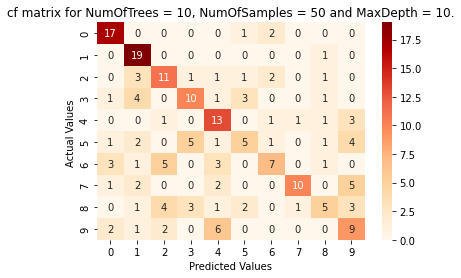

In [31]:
confusionMatrix_plot(cf1, "cf matrix for NumOfTrees = 10, NumOfSamples = 50 and MaxDepth = 10.")

In [28]:
labels2=randomForest(train, trainLabels, test, 10, 50, 100)
acc2 = accuracy_score(testLabels, labels2)
print(acc2)
cf2 = confusion_matrix(testLabels, labels2)
print(cf2)


0.705
[[19  0  0  0  0  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  5 12  1  1  0  0  0  1  0]
 [ 0  3  0 14  0  2  0  0  1  0]
 [ 0  1  1  0 13  1  0  0  0  4]
 [ 1  0  0  3  0 10  0  1  0  5]
 [ 3  0  0  0  3  0 14  0  0  0]
 [ 1  1  0  0  1  0  0 11  0  6]
 [ 1  0  0  1  0  1  0  0 16  1]
 [ 2  0  0  0  2  0  0  3  1 12]]


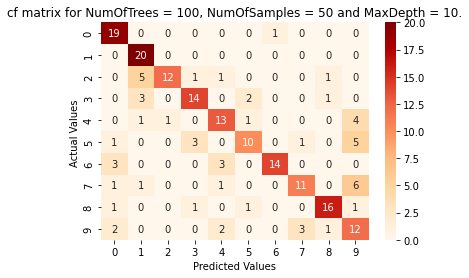

In [29]:
confusionMatrix_plot(cf2, "cf matrix for NumOfTrees = 100, NumOfSamples = 50 and MaxDepth = 10.")

In [26]:
labels3=randomForest(train, trainLabels, test, 10, 500, 100)
acc3 = accuracy_score(testLabels, labels3)
print(acc3)
cf3 = confusion_matrix(testLabels, labels3)
print(cf3)

0.835
[[18  0  0  0  1  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  2 17  0  0  1  0  0  0  0]
 [ 0  0  1 15  0  2  0  0  1  1]
 [ 0  0  0  1 14  0  1  1  0  3]
 [ 0  0  0  2  0 18  0  0  0  0]
 [ 0  0  0  0  2  0 18  0  0  0]
 [ 0  1  0  0  0  0  0 16  0  3]
 [ 1  0  0  1  0  0  0  0 18  0]
 [ 1  0  0  0  2  1  0  3  0 13]]


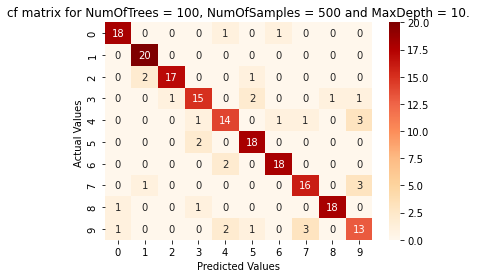

In [27]:
confusionMatrix_plot(cf3, "cf matrix for NumOfTrees = 100, NumOfSamples = 500 and MaxDepth = 10.")

In [24]:
labels4=randomForest(train, trainLabels, test, 100, 1000, 100)
acc4 = accuracy_score(testLabels, labels4)
print(acc4)
cf4 = confusion_matrix(testLabels, labels4)
print(cf4)

0.88
[[18  0  0  0  1  0  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  1 17  1  0  0  0  0  1  0]
 [ 0  0  1 16  0  2  0  0  1  0]
 [ 0  0  0  0 17  0  1  0  0  2]
 [ 0  0  0  1  0 19  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  2]
 [ 1  0  0  1  0  0  0  0 18  0]
 [ 1  0  0  0  2  0  0  3  1 13]]


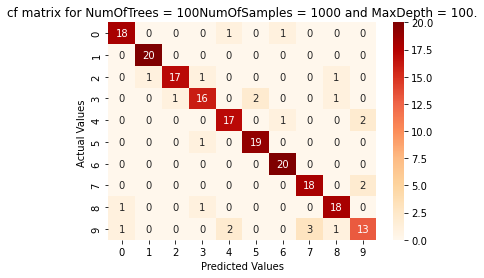

In [25]:
confusionMatrix_plot(cf4, "cf matrix for NumOfTrees = 100NumOfSamples = 1000 and MaxDepth = 100.")